In [1]:
import numpy as np
import matplotlib.pyplot as plt

from qho_time_evolution import Param, Operators
import plot

In [2]:
# SIMULATION PARAMETERS

xmin = -20.0
xmax = 20.0
num_x = 40000
tsim = 10
tc = 10
desired_dt = 0.1
num_t = int(tsim/desired_dt)
num_tc = int(tc/desired_dt)
im_time = False

# Initialize the Param object
par = Param(xmin, xmax, num_x, tsim, num_t, tc, num_tc, im_time)

# ===========================================================================================================

# INITIAL CONDITIONS -> ADD WFC OFFSET

res = num_x
omega = 1.0
num_wfcs = 8
T = 1 
linear_pulse = lambda t: t/5
times = np.linspace(0, tsim, num_t)
pulse = linear_pulse(times)

# Initialize the Operators object
opr = Operators(res, omega, num_wfcs, T, pulse, par)

In [3]:
opr.rho

array([[6.323e-01, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00],
       [0.000e+00, 2.326e-01, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00],
       [0.000e+00, 0.000e+00, 8.560e-02, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00],
       [0.000e+00, 0.000e+00, 0.000e+00, 3.150e-02, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00],
       [0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.160e-02, 0.000e+00,
        0.000e+00, 0.000e+00],
       [0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 4.300e-03,
        0.000e+00, 0.000e+00],
       [0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        1.600e-03, 0.000e+00],
       [0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 6.000e-04]])

In [4]:
print("Energies\n", opr.energies)

Energies
 [0.499999999999997, 1.4999999999999951, 2.4999999999999862, 3.4999999999999707, 4.49999999999999, 5.49999999999999, 6.499999999999963, 7.49999999999995]


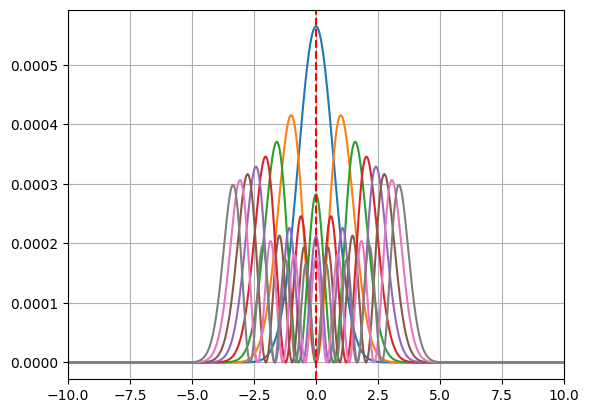

In [5]:
for i in range(opr.num_wfcs):
  plt.plot(par.x, abs(opr.wfcs[i])**2)
  
plt.axvline(opr.r_t[0], color='red', linestyle='--')
plt.xlim(opr.r_t[0] - 10, opr.r_t[0] + 10)
plt.grid()
plt.show()

In [6]:
opr.infidelity()

0.001

In [7]:
opr.time_evolution(par, fixed_potential=False, compute_statistics=True)

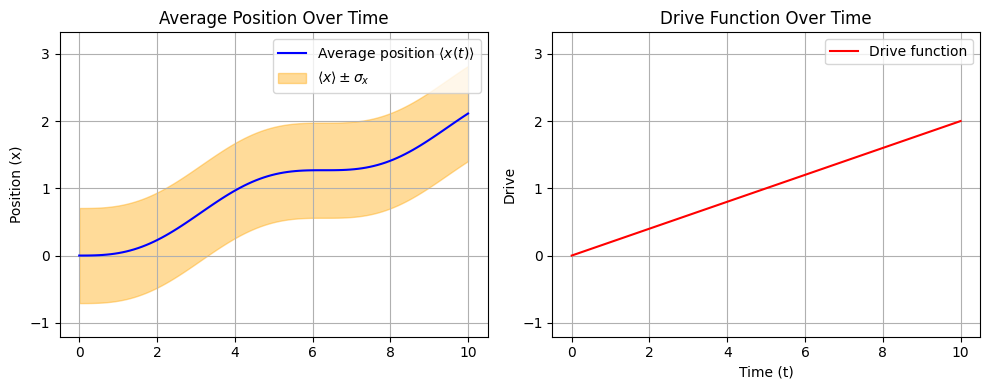

In [8]:
plot.plot_position_statistics(par, opr, 0)

In [9]:
print("Energies\n", opr.energies)

Energies
 [0.5768481748494888, 1.5768491139918703, 2.5768500531342577, 3.5768509922766385, 4.576851931419069, 5.576852870561407, 6.576853809703843, 7.57685474884624]


In [10]:
def plot_wavefunctions(opr, shifted=False):
  wfcs = opr.wfcs if not shifted else opr.shifted_wfcs
  for i in range(opr.num_wfcs):
    plt.plot(par.x, abs(opr.wfcs[i])**2)
  
  plt.axvline(opr.r_t[0], color='blue', linestyle='--', label="Starting point")
  plt.axvline(opr.r_t[-1], color='red', linestyle='--', label="Ending point")
  plt.xlim(opr.r_t[-1] - 7, opr.r_t[-1] + 7)
  
  plt.grid()
  plt.legend()
  plt.show()

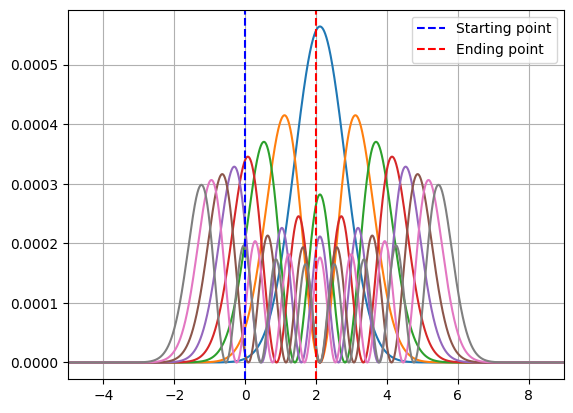

In [11]:
plot_wavefunctions(opr)

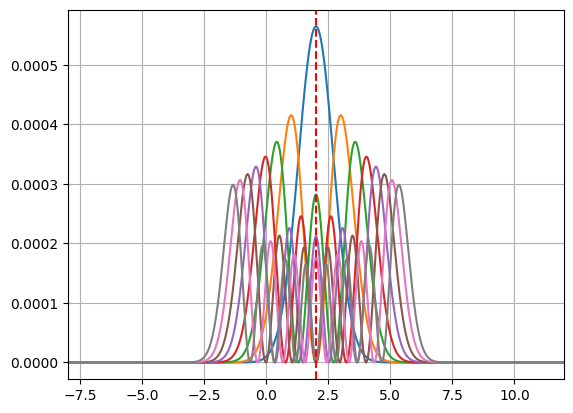

In [12]:
for i in range(opr.num_wfcs):
  plt.plot(par.x, abs(opr.shifted_wfcs[i])**2)

plt.axvline(opr.r_t[-1], color='red', linestyle='--')
plt.xlim(opr.r_t[-1] - 10, opr.r_t[-1] + 10)
plt.grid()
plt.show()

In [13]:
opr.infidelity()

0.034663873637026544085

In [14]:
opr.time_evolution(par, fixed_potential=True, compute_statistics=True)

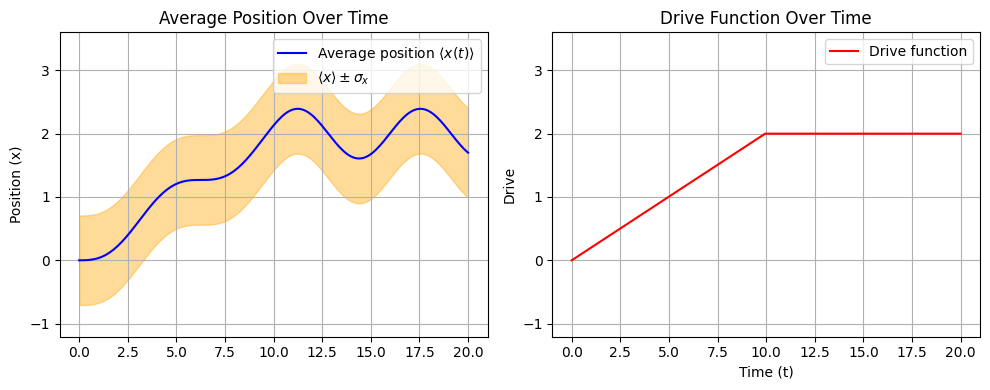

In [15]:
plot.plot_position_statistics(par, opr, 0)

In [16]:
opr.rho

array([[ 6.026e-01+0.000e+00j, -3.010e-02-1.013e-01j,
        -1.060e-02+7.300e-03j,  1.000e-03+7.000e-04j,
         0.000e+00-1.000e-04j,  0.000e+00-0.000e+00j,
        -0.000e+00-0.000e+00j,  0.000e+00-0.000e+00j],
       [-3.010e-02+1.013e-01j,  2.402e-01+0.000e+00j,
        -1.640e-02-5.480e-02j, -6.900e-03+4.800e-03j,
         8.000e-04+6.000e-04j,  0.000e+00-1.000e-04j,
         0.000e+00+0.000e+00j, -0.000e+00-0.000e+00j],
       [-1.060e-02-7.300e-03j, -1.640e-02+5.480e-02j,
         9.540e-02+0.000e+00j, -7.700e-03-2.570e-02j,
        -3.700e-03+2.600e-03j,  5.000e-04+3.000e-04j,
         0.000e+00-1.000e-04j, -0.000e+00-0.000e+00j],
       [ 1.000e-03-7.000e-04j, -6.900e-03-4.800e-03j,
        -7.700e-03+2.570e-02j,  3.780e-02+0.000e+00j,
        -3.400e-03-1.140e-02j, -1.800e-03+1.300e-03j,
         2.000e-04+2.000e-04j,  0.000e+00-0.000e+00j],
       [ 0.000e+00+1.000e-04j,  8.000e-04-6.000e-04j,
        -3.700e-03-2.600e-03j, -3.400e-03+1.140e-02j,
         1.500e-02+0.000

In [17]:
print("Energies\n", opr.energies)

Energies
 [0.5769456283825062, 1.5769482588292532, 2.576950889275956, 3.5769535197227142, 4.576956150169458, 5.576958780616161, 6.5769614110629275, 7.576964041509708]


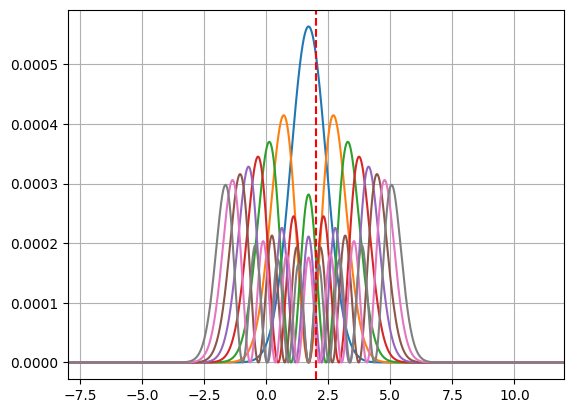

In [18]:
for i in range(opr.num_wfcs):
  plt.plot(par.x, abs(opr.wfcs[i])**2)

plt.axvline(opr.r_t[-1], color='red', linestyle='--')
plt.xlim(opr.r_t[-1] - 10, opr.r_t[-1] + 10)
plt.grid()
plt.show()

In [19]:
opr.infidelity()

0.034712840996958130486

In [20]:
opr.average_infidelity

0.03470466064339039114

# TESTING THE PULSE

In [21]:
from optimization import load_fom, load_best_results

timestamp = "20250220_233845"

fomlist = load_fom(timestamp)
timegrid, pulse = load_best_results(timestamp)

Files inside the archive: ['Pulse_1.npy', 'time_grid_for_Pulse_1.npy', 'pulse_names.npy', 'parameter_names.npy', 'time_names.npy', 'FoM.npy', 'iteration_number.npy', 'super_it.npy', 'status_code.npy']


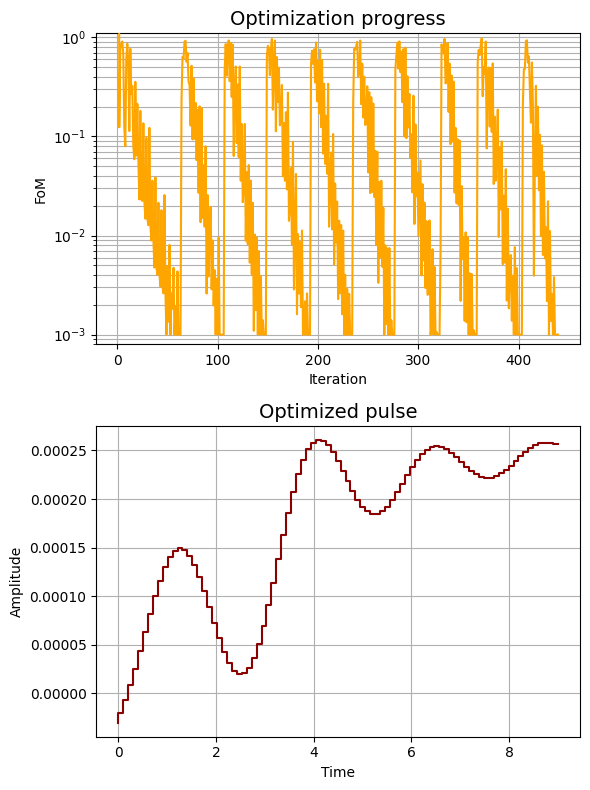

In [22]:
plot.plot_optimization_process(fomlist, timegrid, pulse)

In [27]:
# SIMULATION PARAMETERS

xmin = -20.0
xmax = 20.0
num_x = 4000
tsim = 9
tc = 10
desired_dt = 0.1
num_t = int(tsim/desired_dt)
num_tc = int(tc/desired_dt)
im_time = False

# Initialize the Param object
par = Param(xmin, xmax, num_x, tsim, num_t, tc, num_tc, im_time)

# ===========================================================================================================

# INITIAL CONDITIONS -> ADD WFC OFFSET

res = num_x
omega = 1.0
num_wfcs = 8
T = 1

# Initialize the Operators object
opr = Operators(res, omega, num_wfcs, T, pulse, par)

In [28]:
opr.energies

[0.4999999999999997,
 1.4999999999999987,
 2.499999999999999,
 3.5000000000000018,
 4.500000000000005,
 5.499999999999993,
 6.499999999999994,
 7.499999999999996]

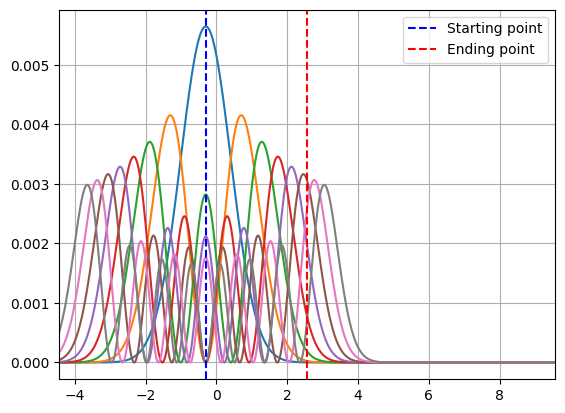

In [29]:
plot.plot_wavefunctions(par, opr)

In [30]:
opr.time_evolution(par, fixed_potential=False, compute_statistics=True)

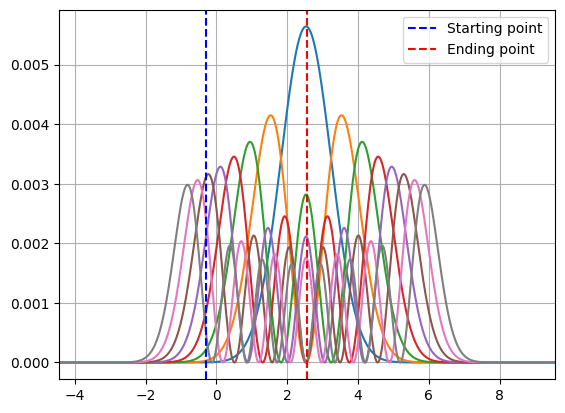

In [31]:
plot.plot_wavefunctions(par, opr)

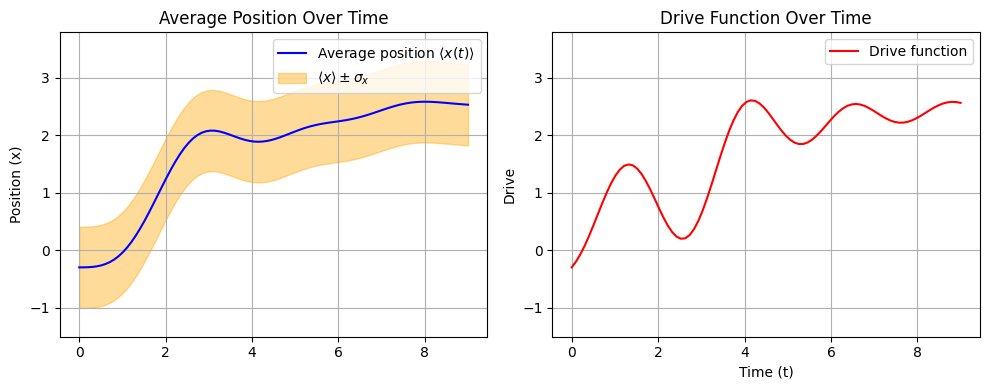

In [36]:
plot.plot_position_statistics(par, opr, 0)

In [37]:
opr.energies

[0.5020351105140745,
 1.5020356337960488,
 2.502036157078017,
 3.502036680359983,
 4.502037203641965,
 5.502037726923917,
 6.502038250205903,
 7.502038773487881]

In [38]:
opr.time_evolution(par, fixed_potential=True, compute_statistics=True)

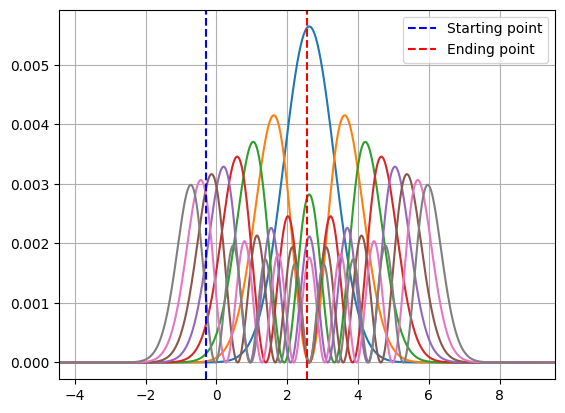

In [40]:
plot.plot_wavefunctions(par, opr)

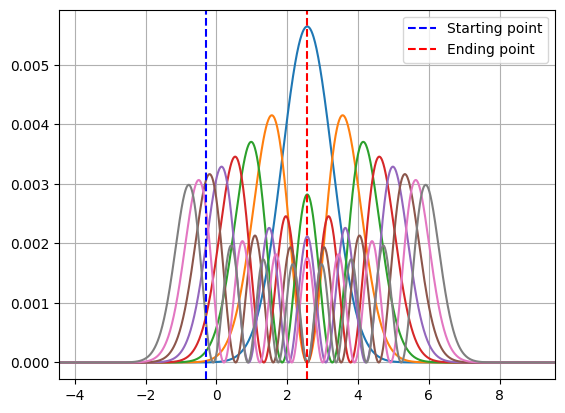

In [41]:
plot.plot_wavefunctions(par, opr, shifted=True)

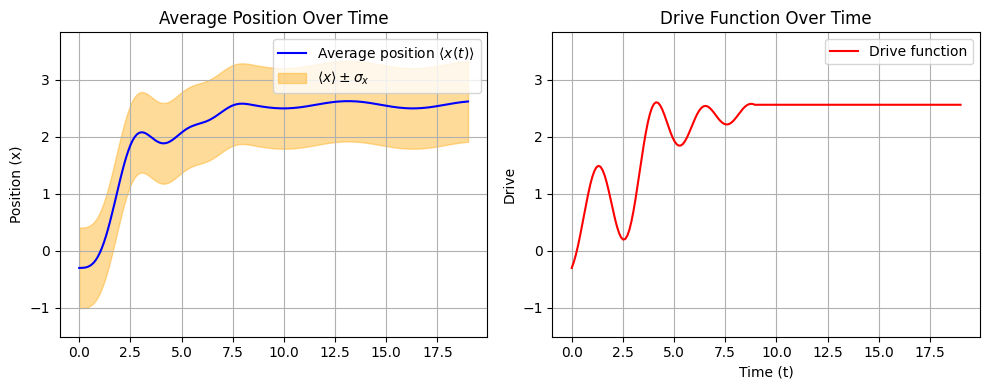

In [42]:
plot.plot_position_statistics(par, opr, 0)

In [43]:
opr.energies

[0.502037668916941,
 1.5020377468366497,
 2.502037824756346,
 3.502037902676041,
 4.502037980595749,
 5.5020380585154305,
 6.502038136435146,
 7.5020382143548385]